# To analyasis the time to travel to seattle could affect the price. Therefore, split the price in listings.csv into two kind of price, which are price_holiday and price_nonholiday

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [71]:
calendar_pd = pd.read_csv('..\dataset_origin\\calendar.csv')
calendar_pd.shape

(1048575, 4)

In [72]:
# Function to show the columns with missing values in descending order.
def show_missing_values(df):
    missing_vals = pd.DataFrame()
    filtered_predicator = []
    missing_vals['amount'] = df.isnull().sum().sort_values(ascending = False)
    missing_vals['ratio'] = round(missing_vals['amount']/len(df),2)
    return missing_vals[missing_vals['amount']>0].dropna()

In [73]:
show_missing_values(calendar_pd)

,amount,ratio
price,348713,0.33


#  price are empty are assumed that they do not have, so drop those rows

In [74]:
# calendar_pd.at[calendar_pd['price'].isnull(), 'price'] = 0

In [75]:
calendar_pd = calendar_pd.dropna()

In [76]:
show_missing_values(calendar_pd)

,amount,ratio


In [77]:
calendar_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699862 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  699862 non-null  int64 
 1   date        699862 non-null  object
 2   available   699862 non-null  object
 3   price       699862 non-null  object
dtypes: int64(1), object(3)
memory usage: 26.7+ MB


# Convert date to datetime and classfify into different months
# Convert price to float

In [78]:
# basic conversions
calendar_pd['date'] = pd.to_datetime(calendar_pd['date'])
calendar_pd['price'] = calendar_pd['price'].str.replace("[$, ]", "").astype("float")
calendar_pd['month'] = calendar_pd["date"].dt.month

# It is weird to find the bookings are almost same in differnt months

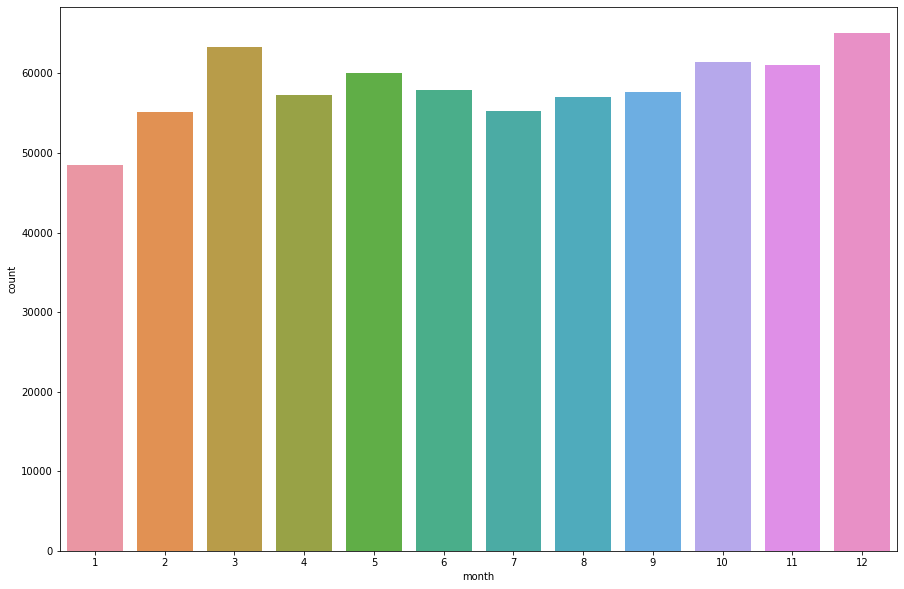

In [79]:
plt.figure(figsize=(15, 10))
sb.countplot(calendar_pd['month'])

# Show the average rent among different months

In [80]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
        ha='center', va='bottom')


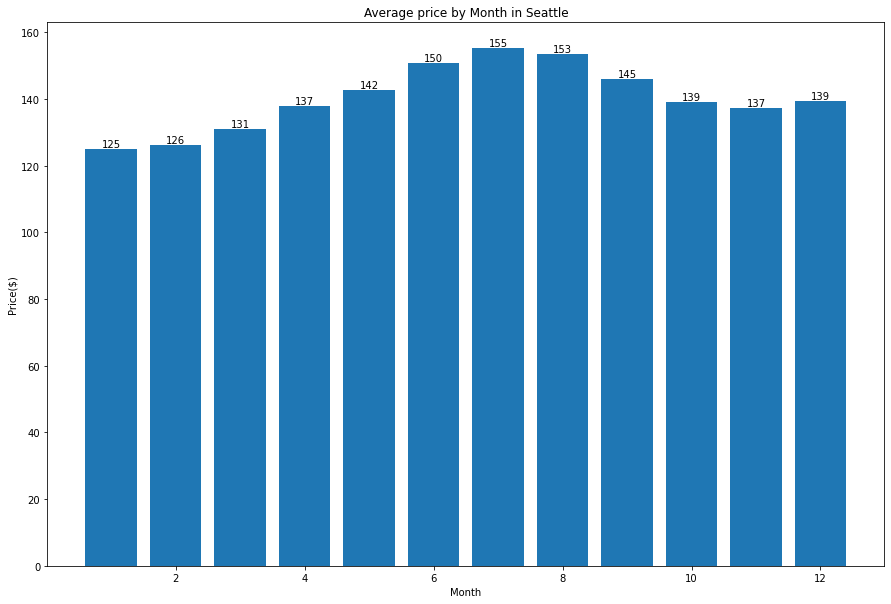

In [81]:
# average rent by month
plotdata2 = calendar_pd[['price']].groupby(calendar_pd["month"]).mean()
plt.figure(figsize=(15, 10))
ax = plt.subplot(1,1,1)
ax.set_title("Average price by Month in Seattle")
plt.xlabel("Month")
plt.ylabel("Price($)")
plt_average = plt.bar(plotdata2.index, plotdata2['price'])
autolabel(plt_average)


In [82]:
calendar_pd[['price']].groupby(calendar_pd["month"]).mean().describe()

,price
count,12.000000
mean,140.364872
std,9.879815
min,125.103239
25%,135.844321
50%,139.213142
75%,147.103151
max,155.263716


In [83]:
# plt.figure(figsize=(15, 10))
# # revenue by month
# plotdata2 = calendar_pd[['price']].groupby(calendar_pd["month"]).sum()
# # plotdata2.rename(columns={'price':'revenue'}, inplace=True)

# ax = plt.subplot(1,1,1)
# ax.set_title("Total avenue per month")
# splot = plt.bar(plotdata2.index, plotdata2['price'])

# After observing the plot of average price by month, we know that June - Angust have the highest average rent among a year, with the rent peaking in July.  
## After google it, we find this time in Seattle has beautiful sunshine, wildflower and very little rain, so host will normally raise up their rent.
## Therefore, we split our response into two-seaon' rent, we will notice the improvement of preidcting accuracy in later demo. 

In [84]:
calendar_pd

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1
...,...,...,...,...,...
1048570,5386937,2016-10-20,t,120.0,10
1048571,5386937,2016-10-21,t,120.0,10
1048572,5386937,2016-10-22,t,120.0,10
1048573,5386937,2016-10-23,t,120.0,10


# To split the calender dataframe into two dataframes by checking the month whether is in holiday season[6,7,8]

In [85]:
# Use Series built-in function: isin() and ~isin()
holiday_season = [6,7,8]
df_holiday = calendar_pd[calendar_pd['month'].isin(holiday_season)]
df_nonholiday = calendar_pd[~calendar_pd['month'].isin(holiday_season)]

# Merge the rows, which have the same listing_id and use the median value as the price

In [86]:
df_holiday = df_holiday[['price']].groupby(calendar_pd["listing_id"]).mean().reset_index()
df_nonholiday = df_nonholiday[['price']].groupby(calendar_pd["listing_id"]).mean().reset_index()

In [87]:
df_holiday

,listing_id,price
0,3335,120.000000
1,5682,60.000000
2,6606,92.826087
3,9531,185.000000
4,9534,125.000000
...,...,...
2172,10309898,250.000000
2173,10310373,20.000000
2174,10331249,45.000000
2175,10339145,285.086957


In [88]:
df_nonholiday

,listing_id,price
0,3335,120.000000
1,5682,51.377880
2,6606,92.857143
3,7369,85.000000
4,9460,113.736842
...,...,...
2790,10309898,250.000000
2791,10310373,20.000000
2792,10331249,45.000000
2793,10339145,222.003663


## Verify the difference between the two seasons. 

In [89]:
df_nonholiday.loc[df_nonholiday['listing_id'] == 6475289]

,listing_id,price
1513,6475289,146.656442


In [90]:
df_holiday.loc[df_holiday['listing_id'] == 6475289]

,listing_id,price
1277,6475289,187.16092


In [91]:
listing_df = pd.read_csv("..\dataset_origin\\listings.csv")

In [92]:
listing_df.rename(columns={'id':'listing_id'}, inplace=True)


In [93]:
df_holiday.rename(columns={'price':'price_holiday'}, inplace=True)
df_nonholiday.rename(columns={'price':'price_nonholiday'}, inplace=True)

In [94]:
df_nonholiday

,listing_id,price_nonholiday
0,3335,120.000000
1,5682,51.377880
2,6606,92.857143
3,7369,85.000000
4,9460,113.736842
...,...,...
2790,10309898,250.000000
2791,10310373,20.000000
2792,10331249,45.000000
2793,10339145,222.003663


In [95]:
listing_df['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [96]:
# MERGE holiday_price
merged_holiday = pd.merge(listing_df, df_holiday, on = 'listing_id', how='left')

In [97]:
# Merge nonholiday_price
merged_holiday_nonholiday = pd.merge(merged_holiday, df_nonholiday, on = 'listing_id', how='left')

In [98]:
merged_holiday_nonholiday['price'] = merged_holiday_nonholiday['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill the na in price_holiday and price_nonholiday with the value in price

In [99]:
merged_holiday_nonholiday['price_holiday'].isnull().sum()
merged_holiday_nonholiday['price_nonholiday'].isnull().sum()

1023

In [100]:
merged_holiday_nonholiday['price_holiday'] = merged_holiday_nonholiday['price_holiday'].fillna(merged_holiday_nonholiday['price'])
merged_holiday_nonholiday['price_nonholiday'] = merged_holiday_nonholiday['price_nonholiday'].fillna(merged_holiday_nonholiday['price'])

In [101]:
# violinPrice = go.Figure(data=go.Violin(x=price_holiday['price'], box_visible=True, line_color='black',
#                                meanline_visible=True, fillcolor='lightseagreen', opacity=0.8,
#                                y0='Price'))

# violinPrice.update_layout(yaxis_zeroline=False)
# violinPrice.show()

# Export to two listings to replace the old listings.csv

In [102]:
merged_holiday_nonholiday.drop(columns=['price'], inplace=True)
# merged_nonholiday.drop(columns=['price'], inplace=True)
merged_holiday_nonholiday.to_csv('../dataset_filter/listings_seasonPrice.csv',index=False)
# merged_nonholiday.to_csv('../dataset_filter/listings_nonholiday.csv',index=False)